In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("C:/Users/Shree Nikhil MC/Desktop/Sample.xls")
#furniture = df.loc[df['Category'] == 'Furniture']
df.Category.nunique()

3

In [3]:
technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [4]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')

technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

In [6]:
technology = technology.set_index('Order Date')
#furniture.index
y = technology['Sales'].resample('MS').mean()

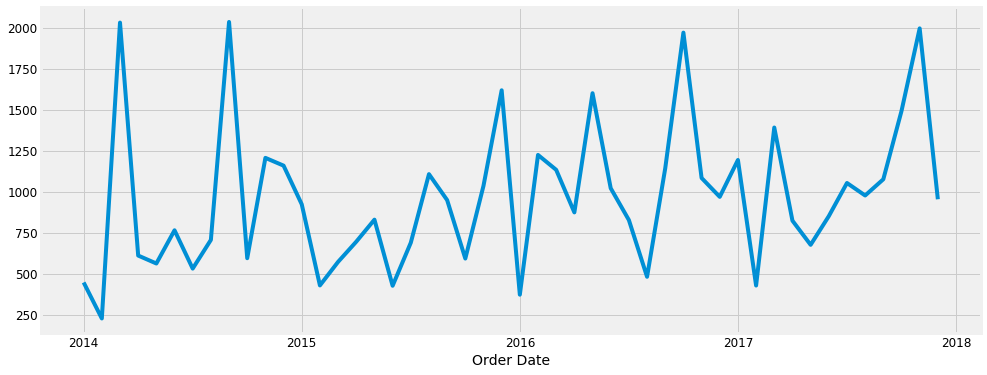

In [7]:
y.plot(figsize=(15, 6))
plt.show()

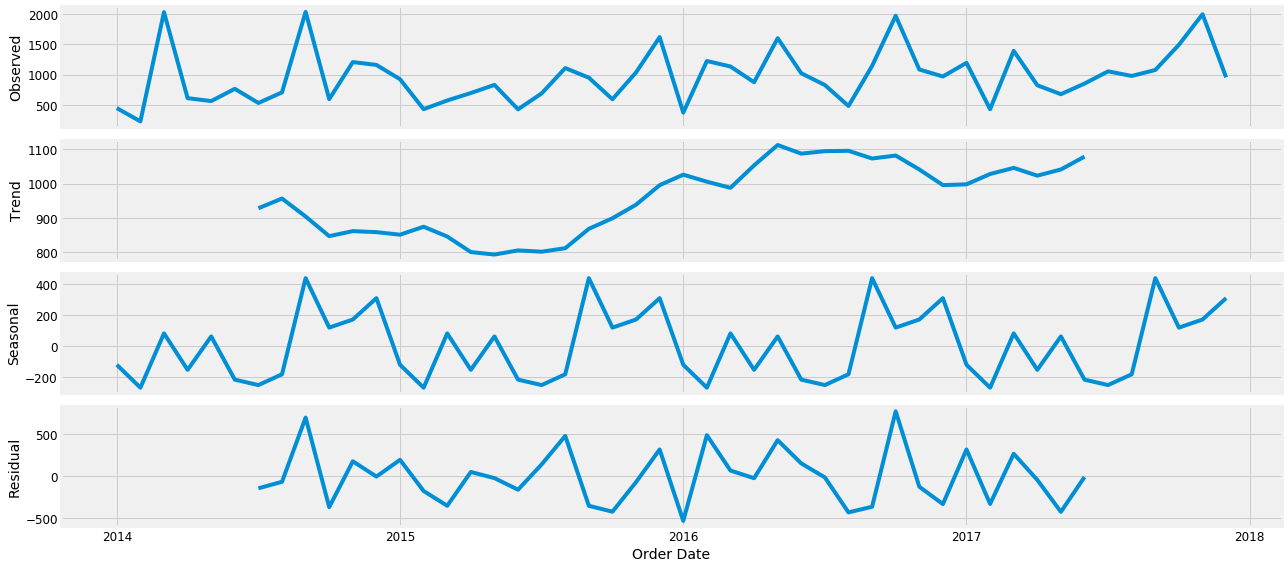

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [9]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:791.4891765009955


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1381.0347611064951
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:549.0156237882128
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.1031529698099


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1487.9034425622215
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:372.6612068172691
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:750.8969484750885
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3051.8298780187833
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.0489454747435
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:566.0827904028376
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2875.8349964287036
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:373.8760065868629
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:729.3478530237927


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1417.9210308851436
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:562.7585881087532
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:543.3082156228088
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1442.4744068537384
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:377.03544814349607
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:675.9599897483578
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3170.751365083307
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.5329284811334
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:526.5542322434043
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2691.5469979588815
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:359.5230842754364
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:742.0250351345342


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1645.172866099678
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:550.272134077019
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:543.2786122758232


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1372.6407565422146
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:359.37687065897023
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:699.8975570622567
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2628.485372710168
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:536.8995751104102
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:527.7942232914842
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2692.815432312765
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:361.314925797491
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:717.9677328156988


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1427.3544014674299
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:555.4581770800665
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:522.504250679654


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1357.099387128099
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:355.12595472751764
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:677.6306925349004
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2607.8156734643567
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:518.790371045406
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:513.1256895923934


C:\Users\Shree Nikhil MC\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2624.963534640311
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.60373359734376


In [11]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


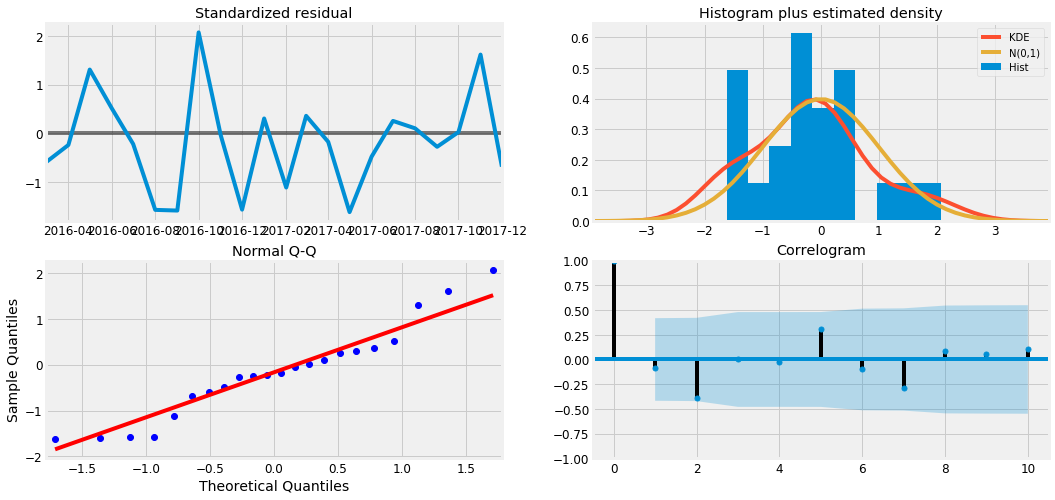

In [12]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

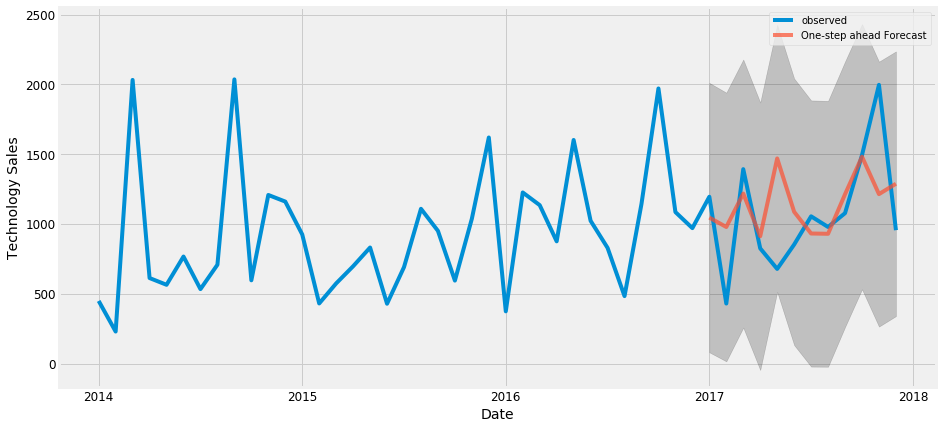

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()

plt.show()

In [14]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

In [15]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 150095.64
The Root Mean Squared Error of our forecasts is 387.42
